In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\train.csv
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\export.pkl
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\0024cdab0c1e.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\00cb6555d108.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\0124dffecf29.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\01b3aed3ed4c.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_filtered_images\gaussian_filtered_images\Mild\0369f3efe69b.png
C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset\gaussian_

In [50]:
import glob
from pathlib import Path
import os.path

image_dir = Path('C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset/gaussian_filtered_images/gaussian_filtered_images')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(5)
#print(image_df)
#print(type(image_df))

,Filepath,Label
0,C:\Users\sm160\OneDrive - Amity University\Des...,Mild
1,C:\Users\sm160\OneDrive - Amity University\Des...,No_DR
2,C:\Users\sm160\OneDrive - Amity University\Des...,No_DR
3,C:\Users\sm160\OneDrive - Amity University\Des...,Severe
4,C:\Users\sm160\OneDrive - Amity University\Des...,Mild


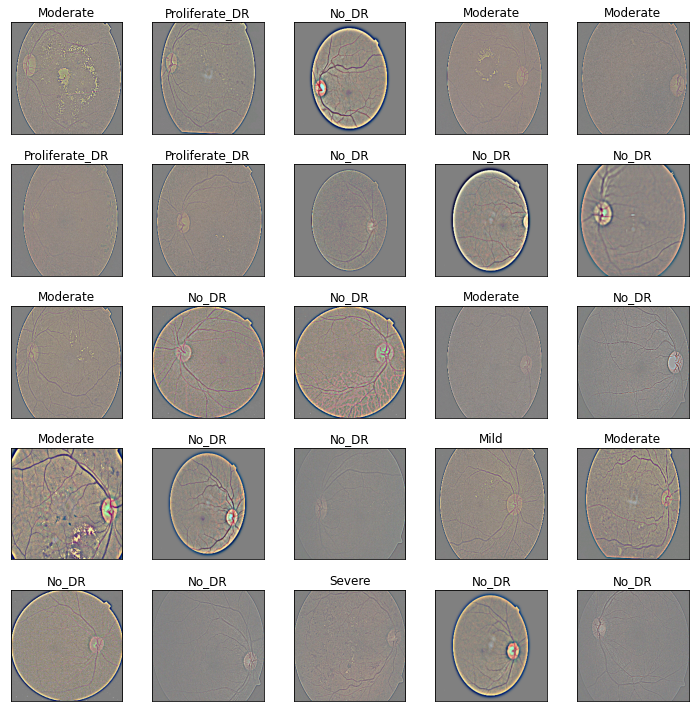

In [4]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
pip install tensorflow


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(image_df, train_size=0.8, shuffle=False, random_state=1)

In [45]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset/gaussian_filtered_images/gaussian_filtered_images',
                                                     #dataframe=train_df,            
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')
valid_data = datagen.flow_from_directory('C:/Users/sm160/OneDrive - Amity University/Desktop/amity/sem8/dataset/gaussian_filtered_images/gaussian_filtered_images',
                                                     #dataframe=test_df,
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [46]:
valid_filepaths = list(valid_data.glob(r'**/*.png'))
valid_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], valid_filepaths))

valid_filepaths = pd.Series(valid_filepaths, name='Filepath').astype(str)
valid_labels = pd.Series(valid_labels, name='Label')

# Concatenate filepaths and labels
test_df = pd.concat([valid_filepaths, valid_labels], axis=1)

# Shuffle the DataFrame and reset index
test_df = test_df.sample(frac=1).reset_index(drop = True)

# Show the result
test_df.head(5)

AttributeError: 'DirectoryIterator' object has no attribute 'glob'

In [31]:
print(valid_data)
print(type(valid_data))
print(type(datagen))

<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'keras.preprocessing.image.ImageDataGenerator'>


In [10]:
!pip install -q efficientnet


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import efficientnet.tfkeras as efn

In [12]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [13]:
model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])
    
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])

In [14]:
history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=1,verbose=1)

C:\Users\sm160\AppData\Local\Temp\ipykernel_12768\1973401056.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=1,verbose=1)


92/92 [==============================] - 401s 4s/step - loss: 1.0172 - acc: 0.6493 - val_loss: 1.1339 - val_acc: 0.5978 - lr: 1.0000e-04


In [20]:
#import matplotlib.pyplot as plt
sheet1=pd.DataFrame(history.history)[['acc','val_acc']]
acc_sheet=sheet1*100
with pd.ExcelWriter('C:/Users/sm160/OneDrive - Amity University/Desktop/output2.xlsx') as writer:  
    acc_sheet.to_excel(writer, sheet_name='Sheet1')
print(acc_sheet)

          acc    val_acc
0   63.800752  63.337892
1   72.705561  64.979482
2   75.878543  73.871410
3   77.277380  75.239396
4   79.119754  76.470590
5   80.348003  77.291381
6   81.064481  80.027360
7   82.053906  77.564979
8   84.305698  78.796172
9   85.465711  76.744187
10  74.650288  71.135432
11  75.776184  71.545827
12  75.127941  76.060194
13  77.209145  72.229820
14  78.744453  74.692202
15  80.177414  75.649792
16  85.636300  79.480165
17  87.103379  83.310533
18  88.706928  80.711353
19  88.706928  80.027360
20  89.593995  82.079345
21  90.856361  80.984950
22  90.208119  81.668949
23  90.924597  80.848151
24  91.641080  83.720928
25  92.357558  80.848151
26  93.688160  81.668949
27  93.926990  80.300957
28  94.506997  80.164158
29  93.722278  81.395346
30  94.438756  81.942546
31  94.506997  80.164158
32  95.837599  79.069769
33  95.325828  80.437756
34  95.428181  80.027360
35  95.291710  81.942546
36  95.701128  81.805748
37  95.701128  81.942546
38  95.769364  80.437756


In [21]:
sheet2=pd.DataFrame(history.history)[['loss','val_loss']]
print(sheet2)
with pd.ExcelWriter('C:/Users/sm160/OneDrive - Amity University/Desktop/output3.xlsx') as writer:  
    sheet2.to_excel(writer, sheet_name='Sheet2')

        loss  val_loss
0   1.053013  1.024933
1   0.718743  0.925056
2   0.637703  0.758501
3   0.602316  0.630081
4   0.550954  0.617110
5   0.517903  0.590692
6   0.498324  0.557756
7   0.468486  0.578679
8   0.428178  0.582940
9   0.399618  0.575714
10  0.809745  0.879288
11  0.767759  1.277535
12  0.844964  0.739127
13  0.783859  0.852667
14  0.659113  1.886033
15  0.600116  0.804185
16  0.379735  0.595845
17  0.341261  0.635457
18  0.323819  0.570186
19  0.295552  0.612553
20  0.273579  0.613123
21  0.242056  0.670520
22  0.244522  0.636374
23  0.248195  0.621500
24  0.237547  0.625095
25  0.204418  0.708045
26  0.191874  0.691411
27  0.163795  0.659807
28  0.153540  0.730320
29  0.170038  0.723500
30  0.155038  0.769561
31  0.146005  0.755938
32  0.141172  0.893567
33  0.129269  0.795813
34  0.131708  0.828636
35  0.126436  0.854796
36  0.118935  0.787554
37  0.118271  0.849604
38  0.110088  0.751551
39  0.111553  0.735963
40  0.102624  0.873603
41  0.091889  0.866155
42  0.09180

In [22]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

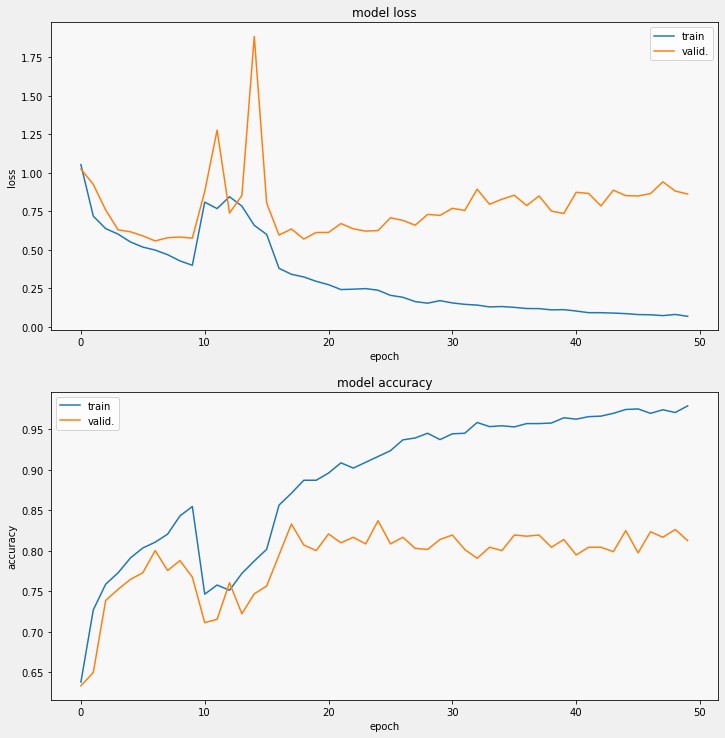

In [23]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['acc'], 
    history.history['val_acc'], 
    'accuracy', 212)

In [15]:
results = model.evaluate(valid_data, verbose=0)

In [17]:
print(valid_data.class_indices)

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}


In [23]:
# Predict the label of the test_images
pred = model.predict(valid_data)
pred = np.argmax(pred,axis=1)
print(type(valid_data))
print(valid_data)

print(pred)
print(type(pred))

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
#print(f'The first 5 predictions: {pred[:5]}')
print(pred)
print(type(pred))

23/23 [==============================] - 23s 964ms/step
<class 'keras.preprocessing.image.DirectoryIterator'>
[2 2 2 1 2 3 2 1 0 1 2 2 2 2 2 2 2 1 3 1 2 2 3 2 2 1 2 3 2 1 2 2 2 3 1 2 2
 2 2 2 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 2 1 2 1 2 2 2 3 1 2 0 2 1 1 2 1
 2 1 1 2 4 1 0 2 0 0 2 2 2 1 2 1 2 1 2 2 2 2 2 1 1 1 1 1 3 2 2 2 2 2 1 2 0
 1 2 2 2 2 1 3 2 2 2 1 1 2 2 2 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 2 3 2 2 2 3 2
 2 2 4 1 2 2 2 2 2 2 2 1 1 3 1 1 2 2 2 2 1 2 2 1 3 2 3 1 1 2 2 2 2 3 1 2 1
 3 1 0 2 2 2 2 1 2 3 2 3 2 1 1 1 1 2 2 2 1 2 1 1 0 2 1 2 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 0 2 2 2 2 1 2 1 1 2 2 1 2 1 2 2 2 2 1 1 2 2 1 1 2 2 2 2 1 2 2
 2 1 1 2 2 1 2 2 2 1 2 1 2 1 3 2 3 2 3 2 1 2 1 2 2 2 1 0 2 2 0 2 4 3 1 2 2
 1 2 3 1 2 3 4 2 2 2 2 3 2 1 2 1 2 2 2 1 1 1 1 1 2 4 2 2 2 2 1 2 1 2 1 1 1
 2 3 2 1 2 2 1 2 2 2 2 2 2 1 2 2 0 1 2 2 1 0 2 2 1 2 2 1 1 1 1 2 2 1 1 1 2
 2 1 0 2 2 1 2 2 2 1 1 1 1 1 2 1 4 2 2 3 1 2 2 2 2 1 2 1 1 2 2 3 2 1 2 2 1
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 3 1 2 1 2 2 1 1 2 2 2 0 2 1 2 1 2 1 

In [20]:
# Map the label
#pred=valid_data
STEP_SIZE_TEST=valid_data.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)
pred = np.argmax(pred,axis=1)
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

print(pred)
print(type(pred))

KeyboardInterrupt: 

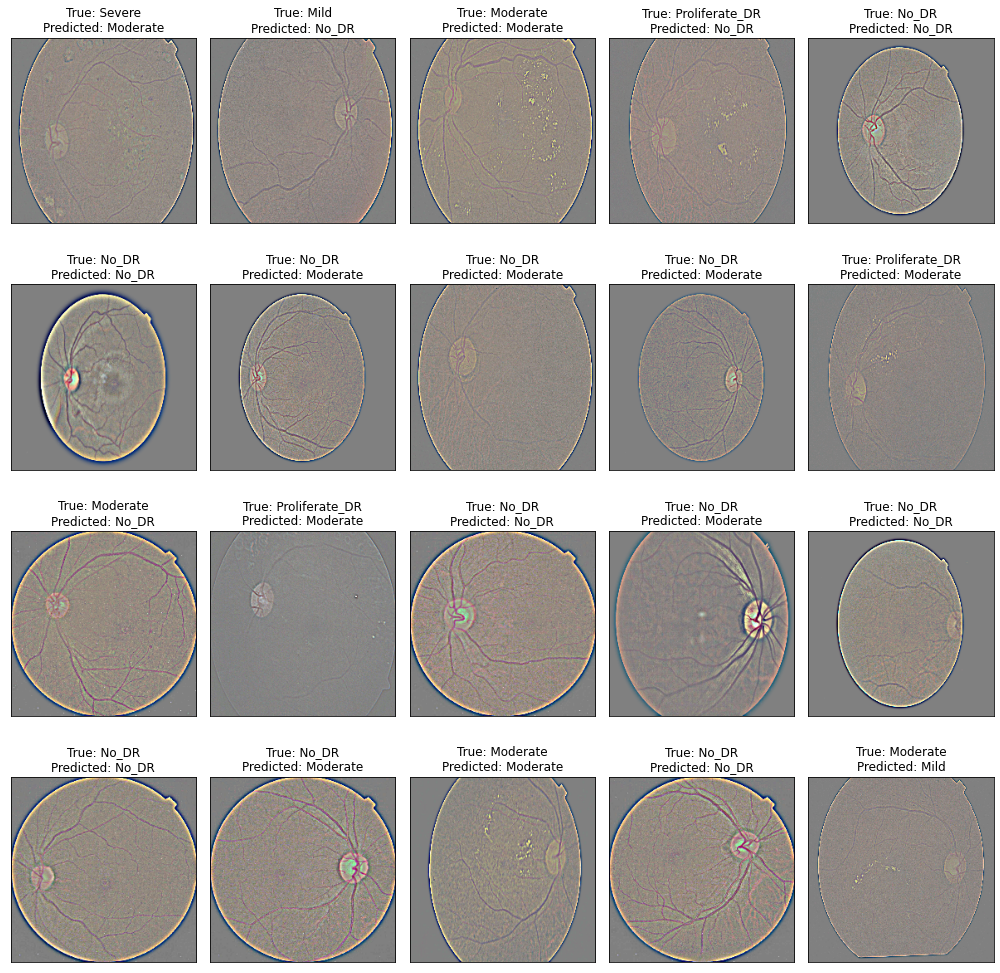

In [27]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(14, 14),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath.iloc[i]))
    ax.set_title(f"True: {image_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 5)                 313605    
                                                                 
Total params: 4,363,169
Trainable params: 4,321,153
Non-trainable params: 42,016
_________________________________________________________________


In [30]:
from IPython.display import Image, display, Markdown

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string)) 
    
printmd(" ## Test Loss: {:.5f}".format(results[0]))
printmd("## Accuracy on the test set: {:.2f}%".format(results[1] * 100))

 ## Test Loss: 0.87804

## Accuracy on the test set: 80.16%